https://github.com/fedhere/PUI2017_fb55/blob/master/HW11_fb55/HW11_Assignment1_instructions.ipynb

Kernel: PUI2016_Python3

In [1]:
import pandas as pd
import numpy as np
import zipfile 
import os
import urllib
import geopandas as gpd
from scipy.cluster.vq import kmeans2, whiten
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#these commands can be run on the shell and get the data with the command wget
#the cell needs to be run only once
#unhash to run 

#!for ((y=94; y<=99; y+=1)); do wget \
#http://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=0; y<=1; y+=1)); do wget \
#http://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=2; y<=9; y+=1)); do wget \
#http://www2.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=10; y<=14; y+=1)); do wget \
#http://www2.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

#### Make dataframe for all data

In [3]:
list1 = []

for i in range(94,100): 
    fname = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df1 = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df1['year'] = i
    df1.columns = [x.lower() for x in df1.columns]
    df1 = df1[(df1['zip'].astype(str).str.startswith('1'))]
    df1 = df1[['zip', 'name', 'est', 'year']]
    list1.append(df1)
    
for i in range(00,15): 
    fname = 'zbp' + str(i).zfill(2) + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df1 = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df1['year'] = i
    df1.columns = [x.lower() for x in df1.columns]
    df1 = df1[(df1['zip'].astype(str).str.startswith('1'))]
    df1 = df1[['zip', 'name', 'est', 'year']]
    list1.append(df1)
    
df1 = pd.concat(list1)

In [4]:
df1.head()

,zip,name,est,year
0,1001,"Agawam, MA",439,94
1,1002,"Amherst, MA",450,94
2,1003,"Amherst, MA",10,94
3,1004,"Amherst, MA",47,94
4,1005,"Barre, MA",92,94


In [5]:
df1.shape

(97171, 4)

In [6]:
df1.year = df1.year.astype(int)

In [7]:
df1.dtypes

zip      int64
name    object
est      int64
year     int64
dtype: object

In [8]:
df1.year = df1.year.replace({94:1994, 95:1995, 96:1996, 97:1997, 98:1998, 99:1999, 0:2000, 
                           1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 
                           7:2007, 8:2008, 9:2009, 10:2010, 11:2011, 12:2012, 
                           13:2013, 14:2014})

In [9]:
df1[::4000]

,zip,name,est,year
0,1001,"Agawam, MA",439,1994
6604,18336,"Matamoras, PA",104,1994
5994,16725,"Custer City, PA",9,1995
5283,15227,"Pittsburgh, PA",397,1996
4619,13691,"THERESA, NY",34,1997
3859,12439,"HENSONVILLE, NY",16,1998
3242,10602,"WHITE PLAINS, NY",55,1999
7242,19930,"BETHANY BEACH, DE",182,1999
6604,18224,"FREELAND, PA",88,2000
5946,16686,"TYRONE, PA",246,2001


In [10]:
df1.shape

(97171, 4)

In [11]:
df_pivot = df1.pivot(index='zip', columns='year', values='est').reset_index()
df_pivot[::300]

year,zip,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,1803,1279.0,1295.0,1306.0,1355.0,1360.0,1357.0,1371.0,1351.0,1347.0,...,1362.0,1377.0,1442.0,1468.0,1437.0,1414.0,1432.0,1441.0,1470.0,1456.0
600,10518,66.0,66.0,66.0,67.0,69.0,68.0,66.0,67.0,60.0,...,78.0,92.0,72.0,70.0,66.0,67.0,67.0,68.0,69.0,66.0
900,11426,326.0,219.0,209.0,198.0,203.0,217.0,213.0,217.0,207.0,...,226.0,226.0,228.0,226.0,237.0,248.0,256.0,266.0,258.0,260.0
1200,12110,996.0,1005.0,1015.0,1036.0,1029.0,1049.0,1068.0,1054.0,1057.0,...,1132.0,1146.0,1163.0,1157.0,1130.0,1158.0,1140.0,1135.0,1157.0,1168.0
1500,12725,5.0,5.0,3.0,2.0,2.0,2.0,3.0,2.0,4.0,...,4.0,4.0,7.0,6.0,5.0,4.0,5.0,7.0,7.0,6.0
1800,13150,2.0,1.0,1.0,4.0,NaN,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,13776,20.0,21.0,18.0,16.0,16.0,15.0,14.0,14.0,13.0,...,12.0,15.0,14.0,14.0,11.0,10.0,12.0,14.0,12.0,9.0
2400,14527,296.0,314.0,319.0,323.0,319.0,330.0,314.0,329.0,326.0,...,344.0,336.0,345.0,336.0,326.0,330.0,340.0,344.0,342.0,341.0
2700,15060,12.0,12.0,12.0,14.0,14.0,11.0,12.0,15.0,16.0,...,15.0,13.0,12.0,13.0,14.0,14.0,13.0,10.0,10.0,12.0


In [12]:
df_pivot.shape

(4967, 22)

In [13]:
df_pivot = df_pivot.dropna(how='any')
df_pivot[::300]

year,zip,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
338,1876,612.0,642.0,653.0,657.0,661.0,678.0,706.0,726.0,746.0,...,778.0,778.0,787.0,765.0,724.0,738.0,705.0,710.0,707.0,706.0
705,10928,79.0,81.0,79.0,81.0,83.0,83.0,87.0,81.0,78.0,...,79.0,73.0,75.0,69.0,74.0,75.0,71.0,68.0,78.0,73.0
1080,11901,675.0,712.0,732.0,780.0,800.0,806.0,863.0,877.0,963.0,...,1038.0,1048.0,1080.0,1066.0,1070.0,1059.0,1047.0,1072.0,1078.0,1112.0
1415,12503,14.0,17.0,16.0,16.0,14.0,15.0,15.0,14.0,21.0,...,23.0,19.0,21.0,20.0,19.0,16.0,17.0,17.0,17.0,17.0
1739,13071,19.0,17.0,19.0,20.0,17.0,17.0,20.0,21.0,18.0,...,23.0,24.0,24.0,24.0,25.0,28.0,28.0,23.0,25.0,24.0
2070,13732,94.0,92.0,90.0,104.0,107.0,113.0,123.0,120.0,116.0,...,116.0,114.0,108.0,111.0,106.0,108.0,106.0,105.0,106.0,102.0
2399,14526,323.0,326.0,325.0,325.0,333.0,337.0,344.0,358.0,350.0,...,364.0,377.0,383.0,386.0,390.0,403.0,400.0,419.0,425.0,441.0
2733,15106,610.0,615.0,620.0,650.0,645.0,647.0,654.0,638.0,638.0,...,615.0,606.0,604.0,582.0,577.0,578.0,575.0,553.0,575.0,575.0
3085,15712,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [14]:
df_pivot.shape

(4341, 22)

#### Get zipcode shapefile

In [15]:
PUIdata = os.getenv('PUIDATA')

filename = "/ZIP_CODE_040114.shp"
url = "https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip"

if not os.path.isfile(PUIdata + filename):
    print("Downloading file now & unzipping to PUIdata")
    urllib.request.urlretrieve(url, PUIdata+filename)
    os.system("unzip -d %s nyc.zip"%(PUIdata))
    
else: 
    print("File already downloaded & unzipped in PUIdata")
    
    
shapefile = PUIdata + "/ZIP_CODE_040114.shp"

nycshp = gpd.GeoDataFrame.from_file(shapefile)
nycshp.head()

File already downloaded & unzipped in PUIdata


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [16]:
nycshp['ZIPCODE'] = nycshp['ZIPCODE'].astype(int)

#### Merge shapefile and df

In [17]:
df = nycshp.merge(df_pivot, left_on="ZIPCODE", right_on="zip")
df.set_index('ZIPCODE')
print("DF Shape:", df.shape)
df[::20]

DF Shape: (243, 35)


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
20,10469,0,Bronx,65101.0,6.804089e+07,NY,Bronx,36,005,http://www.usps.com/,...,609.0,620.0,616.0,628.0,611.0,627.0,629.0,652.0,683.0,667.0
40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,...,345.0,345.0,323.0,328.0,325.0,334.0,342.0,359.0,345.0,374.0
60,11363,0,Little Neck,7060.0,2.424279e+07,NY,Queens,36,081,http://www.usps.com/,...,180.0,172.0,182.0,172.0,173.0,165.0,162.0,178.0,175.0,175.0
80,11005,0,Floral Park,3533.0,9.075527e+06,NY,Queens,36,081,http://www.usps.com/,...,32.0,28.0,39.0,34.0,33.0,34.0,32.0,31.0,33.0,32.0
100,11206,0,Brooklyn,83575.0,4.070072e+07,NY,Kings,36,047,http://www.usps.com/,...,929.0,944.0,953.0,982.0,1030.0,1055.0,1094.0,1150.0,1197.0,1292.0
120,11417,0,Ozone Park,28562.0,3.109909e+07,NY,Queens,36,081,http://www.usps.com/,...,364.0,364.0,372.0,376.0,373.0,391.0,391.0,393.0,419.0,429.0
140,11096,0,Inwood,147.0,1.512446e+06,NY,Queens,36,081,http://www.usps.com/,...,301.0,311.0,311.0,300.0,291.0,300.0,307.0,323.0,323.0,332.0
160,11040,0,New Hyde Park,2349.0,6.269333e+06,NY,Queens,36,081,http://www.usps.com/,...,1441.0,1454.0,1488.0,1503.0,1475.0,1494.0,1488.0,1510.0,1539.0,1534.0
180,11419,0,South Richmond Hill,47054.0,3.127886e+07,NY,Queens,36,081,http://www.usps.com/,...,615.0,637.0,632.0,638.0,640.0,682.0,674.0,703.0,739.0,768.0


In [18]:
df.columns

Index([   'ZIPCODE',    'BLDGZIP',    'PO_NAME', 'POPULATION',       'AREA',
            'STATE',     'COUNTY',    'ST_FIPS',   'CTY_FIPS',        'URL',
       'SHAPE_AREA',  'SHAPE_LEN',   'geometry',        'zip',         1994,
               1995,         1996,         1997,         1998,         1999,
               2000,         2001,         2002,         2003,         2004,
               2005,         2006,         2007,         2008,         2009,
               2010,         2011,         2012,         2013,         2014],
      dtype='object')

In [19]:
df_ts = df[['ZIPCODE', 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014]]
df_ts = df_ts.set_index('ZIPCODE')
print("Shape of DF:", df_ts.shape)
df_ts.head()

Shape of DF: (243, 21)


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [20]:
df_ts = df_ts.sort_index(ascending=True)
df_ts.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0


Note from Federica: 

you may need to clean your data: for some NYC zip codes there may be no info sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data. Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix. Whitening your data in time series analysis is in most cases wrong: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). **Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps**

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))

In [21]:
df_ts2 = df_ts.reset_index()
zips = df_ts2.ZIPCODE
df_white = pd.DataFrame(whiten(df_ts2), columns=df_ts2.columns)
df_white['zips'] = zips
df_white = df_white.drop(['ZIPCODE'], axis=1)
df_white = df_white.set_index('zips')
df_white.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zips,,,,,,,,,,,,,,,,,,,,,
10001,6.137433,6.068535,6.042921,5.983035,6.012407,6.001780,5.964794,5.836677,5.980454,5.932372,...,5.989690,6.036628,6.220153,6.173671,6.115512,6.054717,6.019558,5.966940,5.941585,5.971815
10002,1.564392,1.557374,1.639062,1.713620,1.660167,1.730086,1.856203,2.064923,1.900245,2.011513,...,2.196984,2.186700,2.212361,2.223414,2.323141,2.401484,2.425481,2.436260,2.441009,2.408500
10003,2.855191,2.891287,2.918539,2.956392,3.024438,3.036156,3.002369,2.924834,3.028332,3.101850,...,3.167687,3.182357,3.336257,3.363626,3.431551,3.439173,3.464140,3.475423,3.494041,3.511450
10004,0.977745,0.962335,0.967722,0.981004,0.974716,1.023116,1.054864,1.012568,1.049364,1.048466,...,1.032140,1.067299,1.128840,1.136907,1.154455,1.168968,1.169428,1.189264,1.208250,1.259357
10004,0.977745,0.962335,0.967722,0.981004,0.974716,1.023116,1.054864,1.012568,1.049364,1.048466,...,1.032140,1.067299,1.128840,1.136907,1.154455,1.168968,1.169428,1.189264,1.208250,1.259357


In [22]:
df_scaled = preprocessing.scale(df_ts)
df_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
wc = whiten(df_ts)

In [25]:
df_white.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zips,,,,,,,,,,,,,,,,,,,,,
10001,6.137433,6.068535,6.042921,5.983035,6.012407,6.001780,5.964794,5.836677,5.980454,5.932372,...,5.989690,6.036628,6.220153,6.173671,6.115512,6.054717,6.019558,5.966940,5.941585,5.971815
10002,1.564392,1.557374,1.639062,1.713620,1.660167,1.730086,1.856203,2.064923,1.900245,2.011513,...,2.196984,2.186700,2.212361,2.223414,2.323141,2.401484,2.425481,2.436260,2.441009,2.408500
10003,2.855191,2.891287,2.918539,2.956392,3.024438,3.036156,3.002369,2.924834,3.028332,3.101850,...,3.167687,3.182357,3.336257,3.363626,3.431551,3.439173,3.464140,3.475423,3.494041,3.511450
10004,0.977745,0.962335,0.967722,0.981004,0.974716,1.023116,1.054864,1.012568,1.049364,1.048466,...,1.032140,1.067299,1.128840,1.136907,1.154455,1.168968,1.169428,1.189264,1.208250,1.259357
10004,0.977745,0.962335,0.967722,0.981004,0.974716,1.023116,1.054864,1.012568,1.049364,1.048466,...,1.032140,1.067299,1.128840,1.136907,1.154455,1.168968,1.169428,1.189264,1.208250,1.259357


In [26]:
## Function written by Prof. Sobolevsky in ADS 

def elbow(data1,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data1) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data1, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data1.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data1)**2)/data1.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.834484597261
For n_clusters = 3 The average silhouette_score is : 0.679373567057
For n_clusters = 4 The average silhouette_score is : 0.576319028417
For n_clusters = 5 The average silhouette_score is : 0.568894153671
For n_clusters = 6 The average silhouette_score is : 0.561537662836
For n_clusters = 7 The average silhouette_score is : 0.546153229031
For n_clusters = 8 The average silhouette_score is : 0.537712824576
For n_clusters = 9 The average silhouette_score is : 0.536838962004
For n_clusters = 10 The average silhouette_score is : 0.534245308609


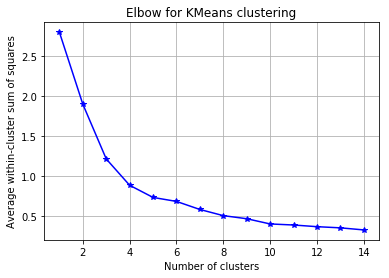

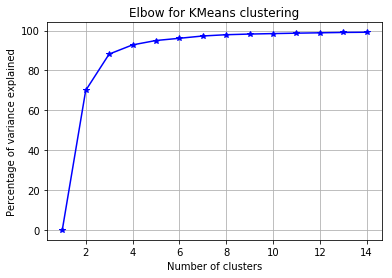

In [27]:
X = np.asarray(df_white.iloc[:,:-1])
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
elbow(X, range(1,15))

Fig 1. The Elbows suggest using around somewhere around 6 clusters. 